<a href="https://colab.research.google.com/github/rushilgowda/AGA-lab-USN-1BM22AI111/blob/main/lab04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

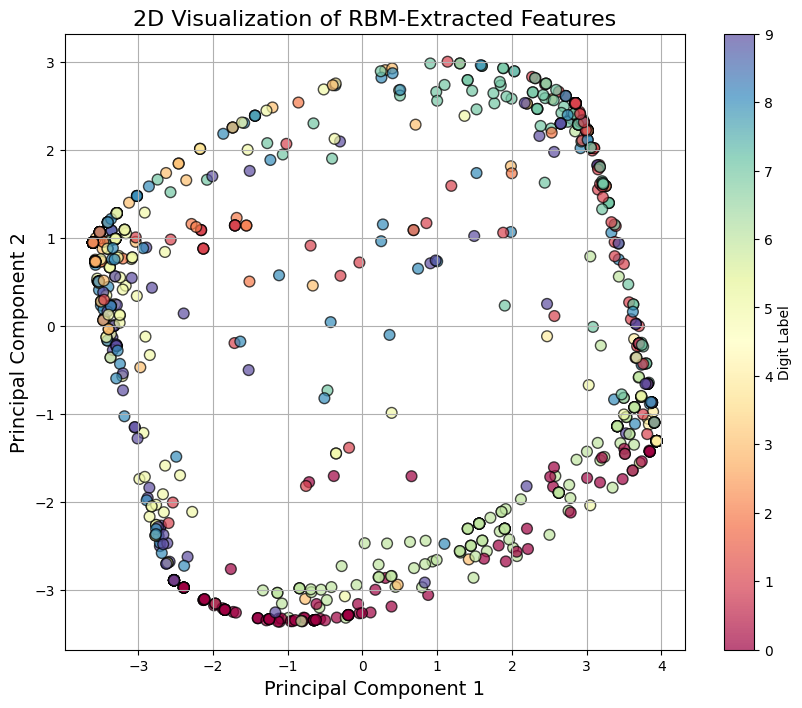


Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.64      0.66        53
           1       0.53      0.52      0.53        50
           2       0.46      0.87      0.60        47
           3       0.42      0.15      0.22        54
           4       0.72      0.98      0.83        60
           5       0.61      0.61      0.61        66
           6       0.90      0.87      0.88        53
           7       0.62      0.82      0.71        55
           8       0.33      0.16      0.22        43
           9       0.61      0.42      0.50        59

    accuracy                           0.61       540
   macro avg       0.59      0.60      0.58       540
weighted avg       0.60      0.61      0.59       540


Accuracy Table:
             Dataset  Accuracy (%)
0  Training Accuracy     66.428003
1   Testing Accuracy     61.296296


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier, BernoulliRBM
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, accuracy_score

digits = load_digits()
X = digits.data
y = digits.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

rbm = BernoulliRBM(n_components=64, learning_rate=0.05, batch_size=10, n_iter=50, random_state=42)
rbm.fit(X_train)

X_train_rbm = rbm.transform(X_train)
X_test_rbm = rbm.transform(X_test)

pca = PCA(n_components=2)
X_train_rbm_2d = pca.fit_transform(X_train_rbm)
X_test_rbm_2d = pca.transform(X_test_rbm)

plt.figure(figsize=(10, 8))
plt.scatter(X_train_rbm_2d[:, 0], X_train_rbm_2d[:, 1], c=y_train, cmap='Spectral', edgecolor='k', s=60, alpha=0.7)
plt.colorbar(label='Digit Label')
plt.title("2D Visualization of RBM-Extracted Features", fontsize=16)
plt.xlabel("Principal Component 1", fontsize=14)
plt.ylabel("Principal Component 2", fontsize=14)
plt.grid(True)
plt.show()

classifier = MLPClassifier(hidden_layer_sizes=(256, 128), max_iter=1000, solver='adam', early_stopping=True, random_state=42)
classifier.fit(X_train_rbm, y_train)

y_pred = classifier.predict(X_test_rbm)

train_acc = accuracy_score(y_train, classifier.predict(X_train_rbm)) * 100
test_acc = accuracy_score(y_test, y_pred) * 100

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

accuracy_data = pd.DataFrame({"Dataset": ["Training Accuracy", "Testing Accuracy"],
                              "Accuracy (%)": [train_acc, test_acc]})
print("\nAccuracy Table:")
print(accuracy_data)

